In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('/home/.../adult.data.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Ответ 1): Мужчин и женщин 32561

2) Каков средний возраст (признак age) женщин?

In [5]:
data[data['sex']=='Female']['age'].mean()

36.85823043357163

Ответ 2): Средний возраст женщин 36.85823043357163

3) Какова доля граждан Германии (признак native-country)?

In [6]:
data['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [7]:
nations = data['native-country'].value_counts(normalize=True)

In [8]:
nations['Germany']*100

0.42074874850281013

Ответ 3): Граждан германии 0,4 %

4) Постройте гистограмму распределения (bar plot) образования людей (признак education).

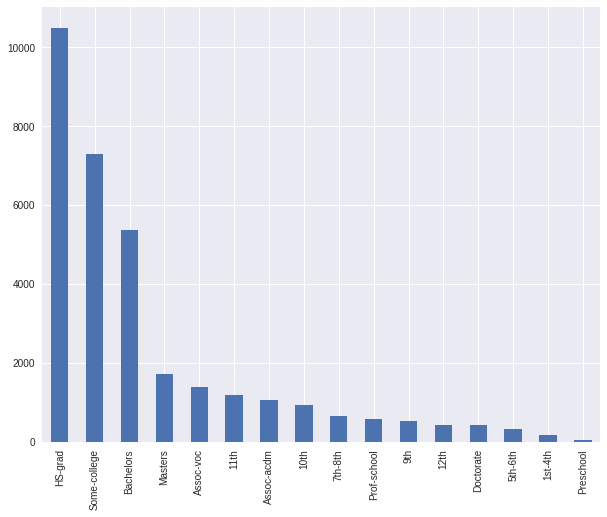

In [9]:
data['education'].value_counts().plot(kind='bar')

5) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [10]:
data.groupby(['salary'])['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


6) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [11]:
pd.crosstab(data['salary'], data['education'], margins=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


Ответ 6): Да, правда

7) Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.

In [12]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

Ответ 7): максимальный возраст мужчин расы Amer-Indian-Eskimo 82 года

8) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [13]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [14]:
d = {'Married-civ-spouse': 1, 'Never-married': 0, 'Divorced': 0, 'Separated': 0, 'Widowed': 0, 
    'Married-spouse-absent': 1, 'Married-AF-spouse': 1}

In [15]:
data['maried_man'] = data['marital-status'].map(d)

In [16]:
pd.crosstab(data['salary'], data['maried_man'])

maried_man,0,1
salary,,
<=50K,16039,8681
>50K,1105,6736


Ответ 8): Женатые мужчины зарабатывают больше

9) Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [17]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [18]:
data[data['hours-per-week'] == data['hours-per-week'].max()]['hours-per-week'].value_counts()

99    85
Name: hours-per-week, dtype: int64

In [19]:
def k(i):
    if i == 99:
        return 1
    else:
        return 0

data['workaholics'] = data['hours-per-week'].apply(k)
data['workaholics'].value_counts()

0    32476
1       85
Name: workaholics, dtype: int64

In [20]:
pd.crosstab(data['salary'], data['workaholics'], margins =True)

workaholics,0,1,All
salary,,,
<=50K,24660,60,24720
>50K,7816,25,7841
All,32476,85,32561


In [21]:
25/85.0*100

29.411764705882355

Ответ 9): Максимальное количество рабочих часов в неделю -- 99, 85 человек работают по 99 часов в неделю, среди них 29.4 % зарабатывают много

10) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [22]:
data.groupby(['native-country', 'salary'])['hours-per-week'].agg(np.mean)

native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc